In [38]:
#All modules and Libraries
from matplotlib import pyplot
import numpy
import pandas
import seaborn

COL = "#FF69B4"
plt = pyplot

In [39]:
# read csv files
df = pandas.read_csv(r"C:\Users\DELL\Downloads\HR_Dataset\cleaned_HR_data.csv")

In [40]:
# determine the total number of rows and columns
df.shape

(833, 12)

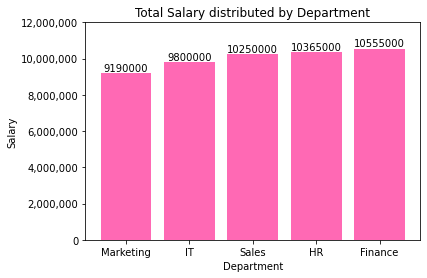

In [41]:
#Salary Distribution by department
salaryDistribution = df.groupby("Department")["Salary"].sum().sort_values()
x = salaryDistribution.index
y = salaryDistribution.values

pyplot.bar(x,y,color=COL)
pyplot.title("Total Salary distributed by Department")
pyplot.xlabel(x.name)
pyplot.ylabel("Salary")
pyplot.ylim(0, max(y)*1.1)

ticks = list(range(0, int(max(y)) + 2000000, 2000000))
pyplot.yticks(ticks, [f"{tick:,}" for tick in ticks])
for h,v in enumerate(salaryDistribution):
    pyplot.text(h,v,str(v),ha="center", va="bottom")
    
pyplot.show()



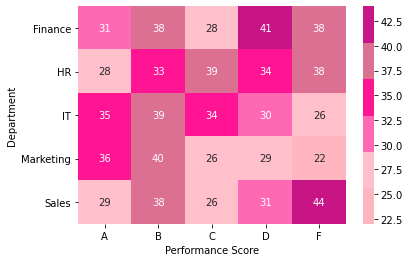

In [42]:
#Grade Distribution by Department
unstacked = df.groupby(["Department", "Performance Score"]).size().unstack(fill_value=0)
seaborn.heatmap(unstacked, annot=True, cmap = ["#FFB6C1", "#FFC0CB", "#FF69B4", "#FF1493", "#DB7093", "#C71585"]
)
pyplot.show()

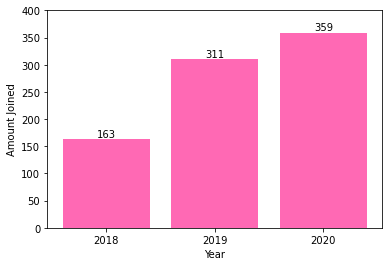

In [43]:
#Year with the most recruiment
yearGroup = df.groupby("Year").size().sort_values()

pyplot.bar(yearGroup.index.astype(str), yearGroup.values, color=COL)
pyplot.yticks(range(0, max(yearGroup.values) + 50, 50))
pyplot.xlabel("Year")
pyplot.ylabel("Amount Joined")

for h,v in enumerate(yearGroup):
    pyplot.text(h,v,str(v), ha="center", va="bottom")

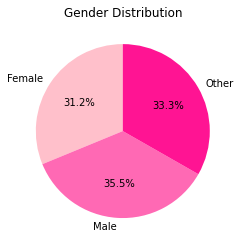

In [44]:
#Gender Distribution
genderDist = df.groupby("Gender").size()
pyplot.pie(
    genderDist.values, 
    labels=genderDist.index, 
    colors=["#FFC0CB", "#FF69B4", "#FF1493"],
    startangle=90,
    autopct='%1.1f%%',
          )
pyplot.title("Gender Distribution")
pyplot.show()

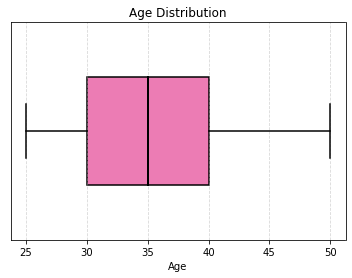

In [45]:
#Check age Distribution using boxplot
seaborn.boxplot(
    x=df["Age"], 
    color=COL, 
    width=0.5,  # Adjust box width
    boxprops={"edgecolor": "black", "linewidth": 1.5},  # Add black border to box
    medianprops={"color": "black", "linewidth": 2},  # Style median line
    whiskerprops={"color": "black", "linewidth": 1.5},  # Style whiskers
    capprops={"color": "black", "linewidth": 1.5},  # Style caps
)

pyplot.grid(axis="x", linestyle="--", alpha=0.5)  # Add subtle grid lines
pyplot.xticks(fontsize=10)  
pyplot.yticks([]) 

pyplot.title("Age Distribution")
pyplot.xlabel("Age")
pyplot.show()

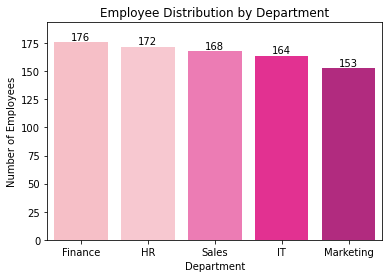

In [46]:
#Visualize the number of employees in each department
seaborn.countplot(x='Department', data=df, palette = ["#FFB6C1", "#FFC0CB", "#FF69B4", "#FF1493", "#C71585"], order=df["Department"].value_counts().index)
y = df["Department"].value_counts().values
pyplot.title("Employee Distribution by Department")
pyplot.xlabel("Department")
pyplot.ylabel("Number of Employees")
pyplot.ylim(0, max(y)*1.1)
for h,v in enumerate(y):
    pyplot.text(h,v,(str(v)),  ha="center", va="bottom")
pyplot.show()

In [47]:
performance_map = {'A':4, 'B':3, 'C':2, 'D':1, 'F':0}
df["Performance Grade"] = df["Performance Score"].map(performance_map)


In [48]:
#Correlation between performance score and salary
correlation = df["Performance Grade"].corr(df['Salary'])
f'{correlation:.2f}'
#Value close to 0 denotes no correlation, 1 shows positive correlation and -1 shows negative corellation

'0.01'

In [49]:
#Display the top 5 employee with the highest salary
df.sort_values(by="Salary", ascending=False)

,Unnamed: 0,Name,Age,Salary,Gender,Department,Position,Joining Date,Performance Score,Year,Month Number,Month,Performance Grade
246,295,Alice,25,70000,Female,HR,Director,2019-03-25,F,2019,3,Mar,0
140,167,David,35,70000,Male,HR,Clerk,2020-02-20,A,2020,2,Feb,4
116,138,Frank,30,70000,Male,Sales,Clerk,2019-03-25,A,2019,3,Mar,4
522,628,Frank,50,70000,Male,Sales,Clerk,2020-01-15,B,2020,1,Jan,3
547,656,Grace,50,70000,Other,IT,Assistant,2020-01-15,C,2020,1,Jan,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,568,Grace,35,50000,Other,IT,Manager,2019-12-01,C,2019,2,Dec,2
491,585,Frank,30,50000,Male,Marketing,Clerk,2018-04-05,F,2018,4,Apr,0
493,587,Eve,35,50000,Other,Finance,Clerk,2019-12-01,D,2019,2,Dec,1
494,588,Frank,50,50000,Male,Marketing,Manager,2020-01-15,A,2020,1,Jan,4


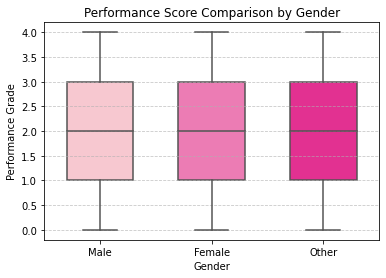

In [50]:
#Compare performance score by gender

seaborn.boxplot(data=df, x="Gender", y="Performance Grade", palette=["#FFC0CB", "#FF69B4", "#FF1493"], width=0.6)
pyplot.title("Performance Score Comparison by Gender")
pyplot.grid(axis="y", linestyle="--", alpha=0.7)
pyplot.show()


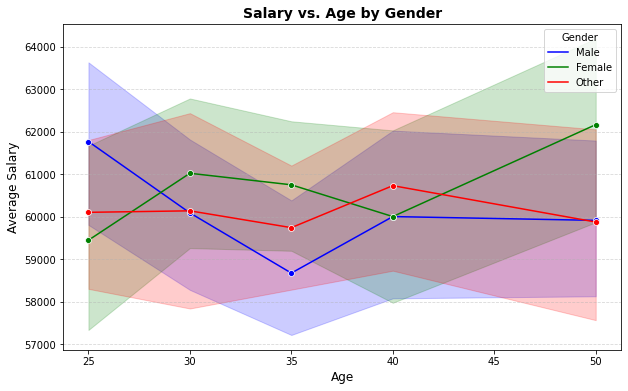

In [68]:
#Salary vs Age by gender
plt.figure(figsize=(10, 6))

# Line plot: Age vs. Average Salary grouped by Gender
seaborn.lineplot(data=df, x="Age", y="Salary", hue="Gender", marker="o", palette = ["blue", "green", "red"])

# Add title and labels
plt.title("Salary vs. Age by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Salary", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Gender")

plt.show()
